In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from src.california_housing import read_data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [55]:
# Load train and test data
df_train = read_data.read_file("fish_regression", "strat_train_set", csv=True)
df_test = read_data.read_file("fish_regression", "strat_test_set", csv=True)

# Simple Linear Regression

#### Visualisation

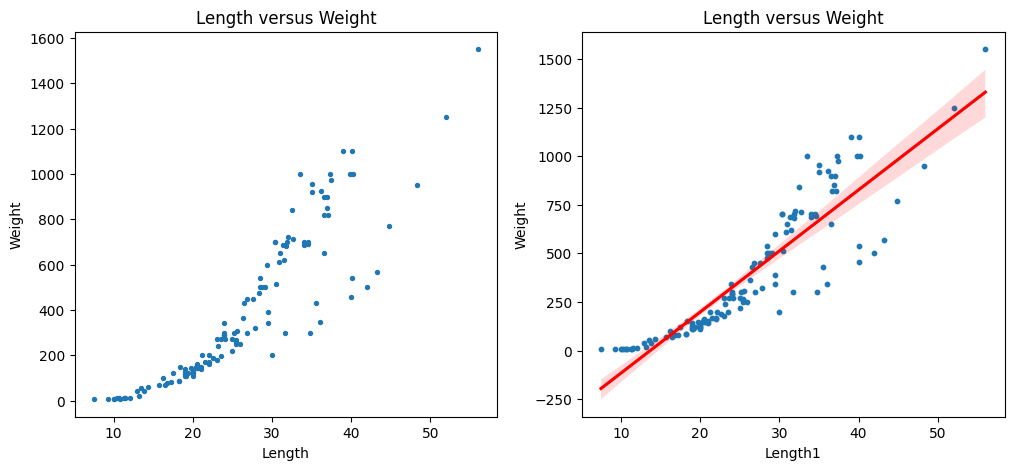

In [56]:
# Create basic Scatter plot
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
ax[0].scatter(df_train["Length1"], df_train["Weight"], s=8)
ax[0].set_xlabel("Length")
ax[0].set_ylabel("Weight")
ax[0].set_title("Length versus Weight")

ax[1].scatter(df_train["Length1"], df_train["Weight"], s=10)
ax[1].set_xlabel("Length")
ax[1].set_ylabel("Weight")
ax[1].set_title("Length versus Weight")
# Adding the regression line using seaborn's 'lmplot'
sns.regplot(x="Length1", y="Weight", data=df_train, scatter=False, ax=ax[1], color="red")

plt.show()

#### Computation using Statsmodels

In [57]:
# Train Dataset: independent variable (Weight), y: dependent variable (Length1)
X_train = df_train['Length1'].values.reshape(-1, 1)
y_train = df_train['Weight']
# Test Dataset: independent variable (Weight), y: dependent variable (Length1)
X_test = df_test['Length1'].values.reshape(-1, 1)
y_test = df_test['Weight']

In [58]:
# Fit the linear regression model on the training data
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

In [59]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     534.8
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           8.48e-47
Time:                        17:29:14   Log-Likelihood:                -805.03
No. Observations:                 126   AIC:                             1614.
Df Residuals:                     124   BIC:                             1620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -430.6613     37.900    -11.363      0.0

In [60]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error on Test Set:", mse)
print("R-squared on Test Set:", r2)

Mean Squared Error on Test Set: 20596.060877691118
R-squared on Test Set: 0.8929800046352011


#### Computation using Scikit-Learn

In [61]:
# Train Dataset: independent variable (Weight), y: dependent variable (Length1)
X_train = df_train['Length1'].values.reshape(-1, 1)
y_train = df_train['Weight']
# Test Dataset: independent variable (Weight), y: dependent variable (Length1)
X_test = df_test['Length1'].values.reshape(-1, 1)
y_test = df_test['Weight']

In [62]:
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [31.42545793]
Intercept: -430.6613499927659


In [64]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 20596.06087769114
R-squared: 0.892980004635201


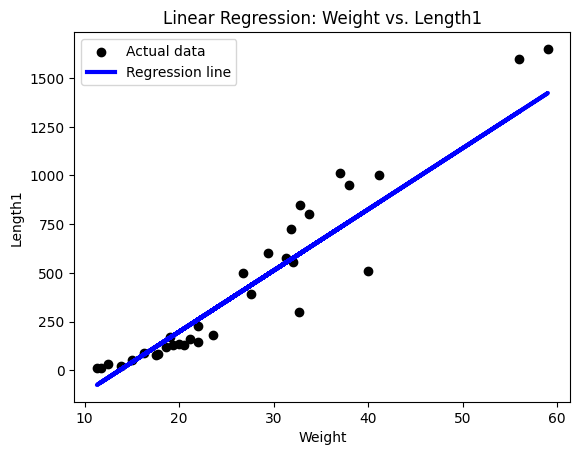

In [65]:
# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.legend()
plt.title('Linear Regression: Weight vs. Length1')
plt.show()